## Method
- Make prediction for city level using experimental design 2 and SEPPexp based on week-days model over localidades.
- Compare model performance using hit rate traditional implementation, true positives proportion and PAI.

## Hypothesis:
SEPP exp prediction based on week-days performance (hitrates and true positives proportion) is better for localidades with high predictability index.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append("..")
from services.prediction_experiment import PredictionExperiment

Failed to import `rtree`.
Failed to import `rtree`.


In [2]:
from services import prediction_metrics

In [3]:
def get_hit_rate_from_dict(row,column,coverage):
    return row[column][coverage]

## SIEDCO

In [4]:
csv_path = '/Users/anamaria/Desktop/dev/security_project/datasets/deduplicate_siedco_09062020.csv'
siedco_info = {'name':'SIEDCO','path':csv_path}

In [5]:
df = pd.read_csv('/Users/anamaria/Desktop/dev/security_project/datasets/deduplicate_siedco_09062020.csv')

/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (32,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
localidades = list(df.LOCALIDAD.unique())
localidades.remove('SUMAPAZ')
localidades.remove('CANDELARIA')

## Localidades analysis

In [13]:
train_dates = {'initial':'2014-03-01','final':'2018-09-30'}
validation_dates = {'initial':'2018-10-01','final':'2018-10-07'}
model = "SEPPexpWeekDay"
metrics = ''
aggregation = ''

In [14]:
df_localidades = pd.DataFrame(index=localidades)
df_localidades.reset_index(inplace=True)
df_localidades.rename(columns={'index': 'localidad'},inplace=True)

In [15]:
array_flag = True
for localidad in localidades:
    print(localidad)
    filter_localidad = {'field':'LOCALIDAD','value':localidad}
    localidad_experiment = PredictionExperiment(dataset_info=siedco_info, custom_filter=filter_localidad,train_dates=train_dates, validation_dates=validation_dates, model=model,metrics='',aggregation_data='')
    prediction_array = localidad_experiment.run_ncv_experiment(time_unit='',grid_size=150, outer_iterations='')
    df_result = pd.DataFrame(prediction_array, columns =['initial-date','final-date','prediction','eval_pts'])
    coverages = [10]
    df_result['hitrate_default'] = df_result.apply(lambda row: prediction_metrics.measure_hit_rates(row['prediction'],row['eval_pts'],coverages,'default'), axis=1)
    df_result['hitrate_TP'] = df_result.apply(lambda row: prediction_metrics.measure_hit_rates(row['prediction'],row['eval_pts'],coverages,'ground_truth_coverage'), axis=1)
    ##For hitrate_TP "true positives"
    df_result['coverage_TP'] = df_result.apply(lambda row: list(row['hitrate_TP'].keys())[0], axis=1)
    df_result['hit_rate_TP'] = df_result.apply(lambda row: list(row['hitrate_TP'].values())[0], axis=1)
    df_result['PAI_TP'] = df_result['hit_rate_TP'] / (df_result['coverage_TP']/100)
    ##For hitrate_default
    column_dict = 'hitrate_default'
    for c in coverages:
        new_hit_rate_column = 'hit_rate_default_coverage_'+str(c)
        df_result[new_hit_rate_column] = df_result.apply(lambda row: get_hit_rate_from_dict(row,column_dict,c), axis=1)
        ##PAI
        new_column = 'PAI_default_coverage_'+str(c)
        df_result[new_column] = df_result[new_hit_rate_column]/(c/100)
    
    df_result = df_result[df_result['hit_rate_default_coverage_10']!= -1]
    
    element = np.array([localidad, df_result['hit_rate_default_coverage_10'].mean(),df_result['coverage_TP'].mean(),df_result['hit_rate_TP'].mean()])

    if array_flag==True:
        array_flag = False
        array = element
    else:
        array = np.vstack((array, element))


CIUDAD BOLIVAR


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (32,44) have mixed types. Specify dtype option on import or set low_memory=False.
  


train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 9, 30, 0, 0)}
current_validation_date 2018-10-01 00:00:00
omega: 0.03405440357609233, theta: 0.013773455015554159
1020
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 1, 0, 0)}
current_validation_date 2018-10-02 00:00:00
omega: 0.048931376979710325, theta: 0.011897232426639991
837
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 2, 0, 0)}
current_validation_date 2018-10-03 00:00:00
omega: 1.3519812389280557, theta: 0.0047507048962434325
839
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 3, 0, 0)}
current_validation_date 2018-10-04 00:00:00
omega: 0.026432791041875275, theta: 0.010543540839373367
844
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 4, 0, 0)}
curren

../services/process_data.py:77: UserWarning: Empty filter result, check dates. Initial date: 2018-10-06, final date: 2018-10-07
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 6, 0, 0)}
current_validation_date 2018-10-07 00:00:00
omega: 0.0051007481007799334, theta: 0.012530189781323206
707
BOSA
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 9, 30, 0, 0)}
current_validation_date 2018-10-01 00:00:00
omega: 0.0123412579021374, theta: 0.02297430124455529
835
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 1, 0, 0)}
current_validation_date 2018-10-02 00:00:00
omega: 0.010498799927970443, theta: 0.019212406109977268
780
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 2, 0, 0)}
current_validation_date 2018-10-03 00:00:00
omega: 0.0075452896282551885, theta: 0.020815233228049432
740
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 3, 0, 0)}
c

../services/process_data.py:77: UserWarning: Empty filter result, check dates. Initial date: 2018-10-04, final date: 2018-10-05
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 4, 0, 0)}
current_validation_date 2018-10-05 00:00:00
omega: 0.003464219643895019, theta: 0.01709110852464053
366
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 5, 0, 0)}
current_validation_date 2018-10-06 00:00:00
omega: 0.002379090147035753, theta: 0.006718953435052511
425
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 6, 0, 0)}
current_validation_date 2018-10-07 00:00:00
omega: 0.003025840679898195, theta: 0.013519093721723099
438
ENGATIVA
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 9, 30, 0, 0)}
current_validation_date 2018-10-01 00:00:00
omega: 0.04754497529708822, theta: 0.008409334434557545
821
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 1, 0, 0)

omega: 0.003725638828304032, theta: 0.013523139336256818
1992
LOS MARTIRES
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 9, 30, 0, 0)}
current_validation_date 2018-10-01 00:00:00
omega: 0.006552778839305406, theta: 0.01965683333261968
286
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 1, 0, 0)}
current_validation_date 2018-10-02 00:00:00
omega: 0.003786258948288748, theta: 0.023387872619319384
411
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 2, 0, 0)}
current_validation_date 2018-10-03 00:00:00
omega: 0.013862489078153321, theta: 0.026912104386498558
407
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 3, 0, 0)}
current_validation_date 2018-10-04 00:00:00
omega: 0.0030872892804557892, theta: 0.034075625866390784
411
train_subset_dates {'initial': datetime.datet

../services/process_data.py:77: UserWarning: Empty filter result, check dates. Initial date: 2018-10-07, final date: 2018-10-08
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


SAN CRISTOBAL
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 9, 30, 0, 0)}
current_validation_date 2018-10-01 00:00:00
omega: 0.0025107181544907777, theta: 0.013409179924001076
596
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 1, 0, 0)}
current_validation_date 2018-10-02 00:00:00
omega: 0.002516025717284372, theta: 0.01434531717185617
575
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 2, 0, 0)}
current_validation_date 2018-10-03 00:00:00
omega: 0.05728443875433197, theta: 0.011596307228698713
594
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 3, 0, 0)}
current_validation_date 2018-10-04 00:00:00
omega: 0.0795336751677241, theta: 0.012872943053436543
614
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 4, 0

../services/process_data.py:77: UserWarning: Empty filter result, check dates. Initial date: 2018-10-03, final date: 2018-10-04
  warnings.warn('Empty filter result, check dates. Initial date: '+initial_date.strftime('%Y-%m-%d')+', final date: '+real_final_date.strftime('%Y-%m-%d'))


train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 3, 0, 0)}
current_validation_date 2018-10-04 00:00:00
omega: 0.004856961879331242, theta: 0.016910649046885117
319
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 4, 0, 0)}
current_validation_date 2018-10-05 00:00:00
omega: 0.0032713005659028155, theta: 0.031593176920849494
365
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 5, 0, 0)}
current_validation_date 2018-10-06 00:00:00
omega: 0.00831161805051363, theta: 0.015370604970879411
378
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 10, 6, 0, 0)}
current_validation_date 2018-10-07 00:00:00
omega: 0.003743915655072384, theta: 0.027833743326180476
362
ANTONIO NARIÑO
train_subset_dates {'initial': datetime.datetime(2014, 3, 1, 0, 0), 'final': datetime.datetime(2018, 9, 3

In [18]:
df_localidades_hit_rate = pd.DataFrame(array, columns =['localidad','hit_rate_default','coverage_TP','hit_rate_TP'])

In [19]:
df_localidades_hit_rate

,localidad,hit_rate_default,coverage_TP,hit_rate_TP
0,CIUDAD BOLIVAR,0.5324074074074074,0.055579507975104886,0.0
1,SUBA,0.6403508771929824,0.03364969617756146,0.013157894736842105
2,USAQUEN,0.41666666666666663,0.0374505815658963,0.0
3,BOSA,0.3452380952380952,0.10862619766547794,0.015873015873015872
4,SANTA FE,0.7619047619047619,0.06504720696195766,0.0
5,CHAPINERO,0.75,0.04231674999757888,0.0
6,ENGATIVA,0.36666666666666664,0.0420240014940793,0.0
7,PUENTE ARANDA,0.18333333333333332,0.11512814144393091,0.0
8,TUNJUELITO,0.45,0.22855002370019054,0.2833333333333333
9,RAFAEL URIBE URIBE,0.39215686274509803,0.14259682491549544,0.029411764705882353


## Plot maps

In [20]:
import geopandas as gpd

In [23]:
workingPath= '/Users/anamaria/Desktop/dev/security_project/'
def map_localidad(ax,df,col_localidad,col_vals,vmin=None,vmax=None):
    loc_geo=workingPath+"assets/localidades_polygon.json"
    loc_=gpd.read_file(loc_geo)
    loc_=loc_.merge(df,left_on='LocNombre',right_on=col_localidad)
    loc_.plot(cmap='viridis',edgecolor='white',column=col_vals,ax=ax,vmin=vmin,vmax=vmax,legend=True)

## Map hit rate (default implementation) coverage 10%

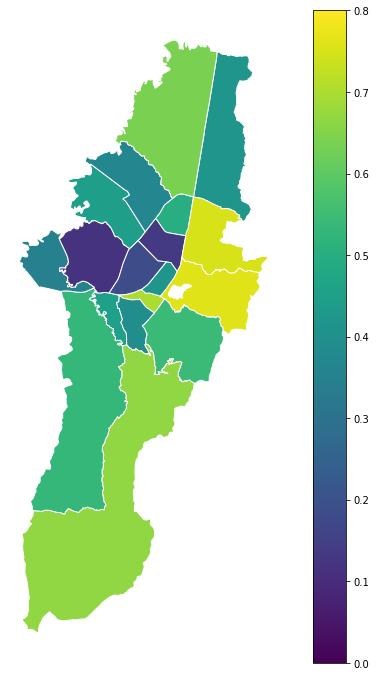

In [32]:
df_localidades_hit_rate["hit_rate_default"] = pd.to_numeric(df_localidades_hit_rate["hit_rate_default"])
fig, ax = plt.subplots(figsize=(12,12))
map_localidad(ax,df_localidades_hit_rate,'localidad','hit_rate_default',vmin=0,vmax=0.8)
ax.axis('off')
file_path = 'periodicity_experiments/predictability/figures/'
#plt.savefig(workingPath+file_path+'map_aggressiveBehavior_localidades'+str(name_experiment)+'_predictability_time_'+str(lenWindow)+'_levels_'+str(crime_level),dpi=300,bbox_inches = "tight")
plt.show()

## Map hit rate (true positives proportion) coverage set based on background events

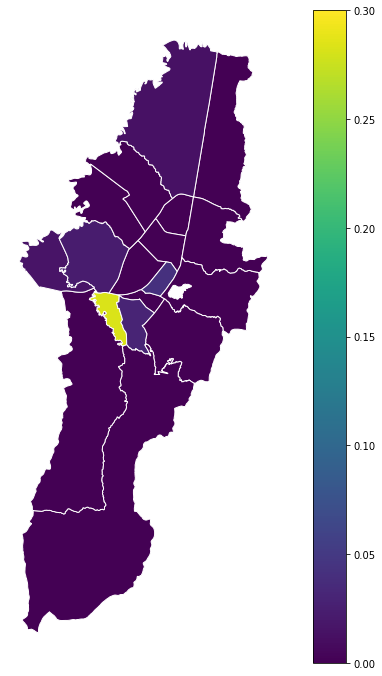

In [35]:
df_localidades_hit_rate["hit_rate_TP"] = pd.to_numeric(df_localidades_hit_rate["hit_rate_TP"])
fig, ax = plt.subplots(figsize=(12,12))
map_localidad(ax,df_localidades_hit_rate,'localidad','hit_rate_TP',vmin=0,vmax=0.3)
ax.axis('off')
file_path = 'periodicity_experiments/predictability/figures/'
#plt.savefig(workingPath+file_path+'map_aggressiveBehavior_localidades'+str(name_experiment)+'_predictability_time_'+str(lenWindow)+'_levels_'+str(crime_level),dpi=300,bbox_inches = "tight")
plt.show()